In [3]:
#importing all needed libraries
import sys
import scipy
import numpy
import pandas
import matplotlib
import sklearn

In [4]:
#checking the versions of imported libraries
print('Python : {}'.format(sys.version))
print('Scipy : {}'.format(scipy.__version__))
print('Numpy : {}'.format(numpy.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Sklearn : {}'.format(sklearn.__version__))

Python : 3.5.2 |Anaconda 4.3.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Scipy : 0.18.1
Numpy : 1.11.3
Pandas : 0.19.2
Matplotlib : 2.0.0
Sklearn : 0.18.1


In [5]:
#load libraries
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot as plt
from ggplot import *
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
#load csv from system
path = '~/Workspace/datasets/Chronic_Kidney_Disease/chronic_kidney_disease (copy).csv'
columns = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class']
dataset = pandas.read_csv(path,names=columns)

In [7]:
#insert missing value

In [8]:
#shape of dataset
print(dataset.shape)

(400, 25)


In [9]:
#head
print(dataset.head(10))

   age   bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...    pcv   wbcc  rbcc  \
0   73  100  1.010   3   2    0   0    1   0  295  ...     30   7000  3.20   
1   51  100  1.015   2   0    0   0    0   0  129  ...     14   6300  4.71   
2   64   60  1.010   4   1    0   0    0   1  239  ...     29   7500  3.40   
3   70   90  1.020   2   1    0   0    0   1  184  ...     39   8406  4.71   
4   56   70  1.015   4   1    0   1    0   0  210  ...     52  12500  5.60   
5   34   70  1.015   4   0    0   0    0   0  153  ...     39   8406  4.71   
6   42   90  1.020   2   0    0   0    1   0   93  ...     34   9800  4.71   
7   60   90  1.010   3   5    0   1    0   1  490  ...     35  12000  4.50   
8   48  110  1.015   3   0    0   1    1   0  106  ...     26   5000  2.50   
9   53  100  1.010   1   3    0   1    0   0  213  ...     39   8406  4.71   

   htn  dm  cad  appet  pe  ane  class  
0    1   1    1      0   0    0    ckd  
1    1   0    0      1   1    1    ckd  
2    1   1    0   

In [10]:
#description
print(dataset.describe())

              age          bp          sg          al          su         rbc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.472500   76.485000    1.017408    1.015000    0.395000    0.882500   
std     16.975118   13.476603    0.005369    1.272329    1.040038    0.322418   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    1.015000    0.000000    0.000000    1.000000   
50%     54.000000   78.500000    1.017408    1.000000    0.000000    1.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.000000    1.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000    1.000000   

               pc         pcc          ba         bgr     ...            hemo  \
count  400.000000  400.000000  400.000000  400.000000     ...      400.000000   
mean     0.810000    0.105000    0.055000  148.032500     ...       12.526900   
std      0.392792    0.3069

In [11]:
#class distribution
print(dataset.groupby('class').size())

class
ckd       250
notckd    150
dtype: int64


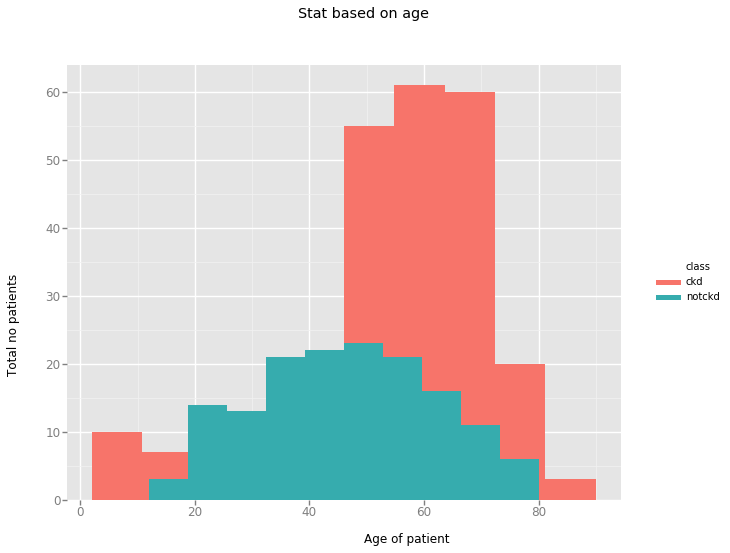

<ggplot: (-9223363261123166618)>

In [51]:
#plots
#General stat - Based on age.gg = ggplot(dataset, aes('age', fill='class')) 
gg + geom_histogram() + ggtitle('Stat based on age') + xlab('Age of patient') + ylab('Total no patients')

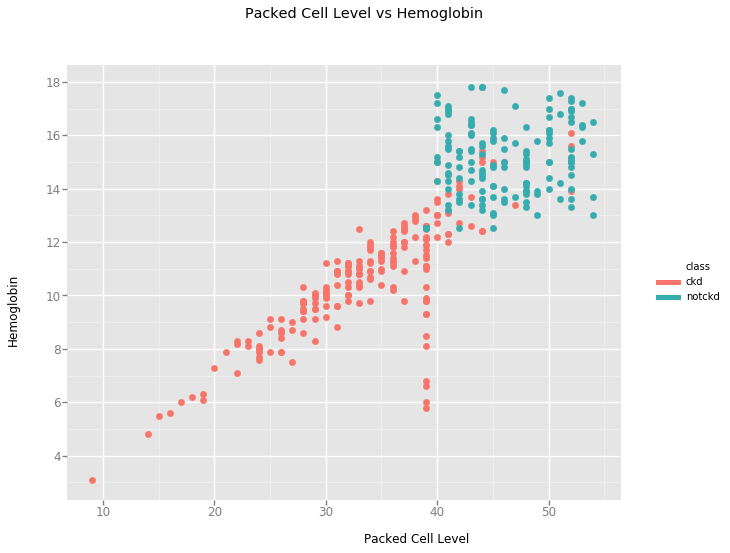

<ggplot: (8775731536090)>

In [35]:
#ggplot
#scenario 1
gg = ggplot(dataset, aes('pcv','hemo', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Packed Cell Level vs Hemoglobin') + xlab('Packed Cell Level') + ylab('Hemoglobin')

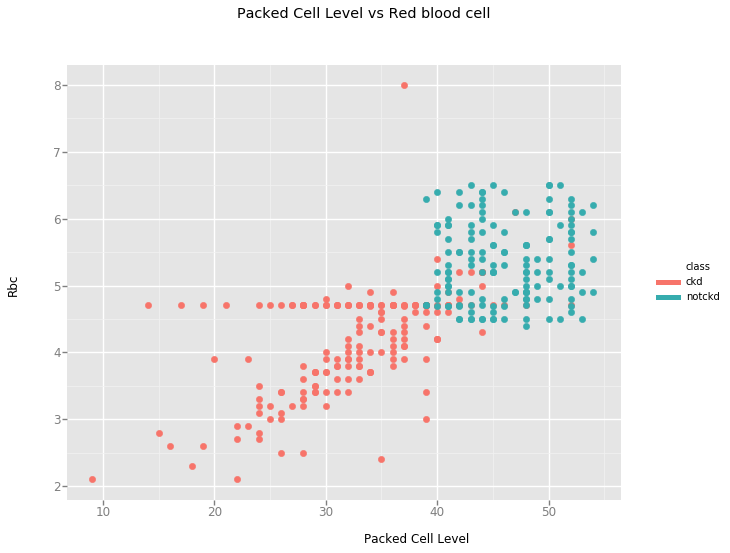

<ggplot: (8775731537349)>

In [38]:
#scenario 2
gg = ggplot(dataset, aes('pcv','rbcc', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Packed Cell Level vs Red blood cell') + xlab('Packed Cell Level') + ylab('Rbc')

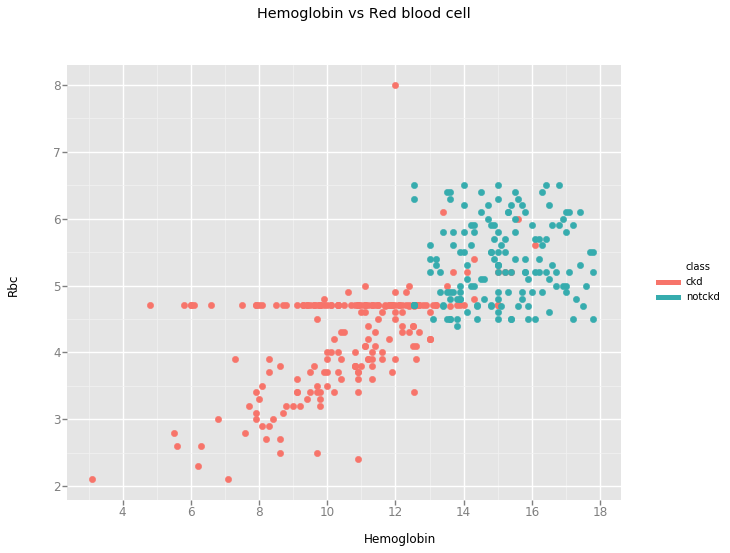

<ggplot: (-9223363261123197538)>

In [39]:
#scenario 3
gg = ggplot(dataset, aes('hemo','rbcc', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Hemoglobin vs Red blood cell') + xlab('Hemoglobin') + ylab('Rbc')

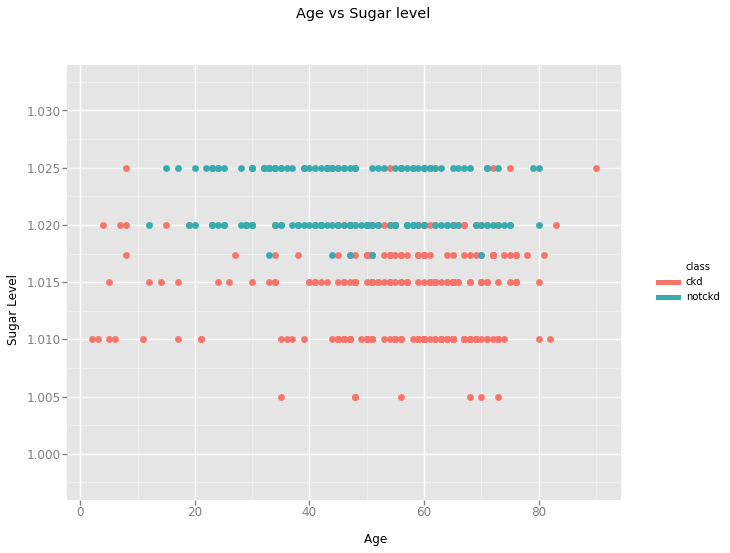

<ggplot: (-9223363261123252571)>

In [36]:
#scenario 4
gg = ggplot(dataset, aes('age','sg', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Age vs Sugar level') + xlab('Age ') + ylab('Sugar Level')

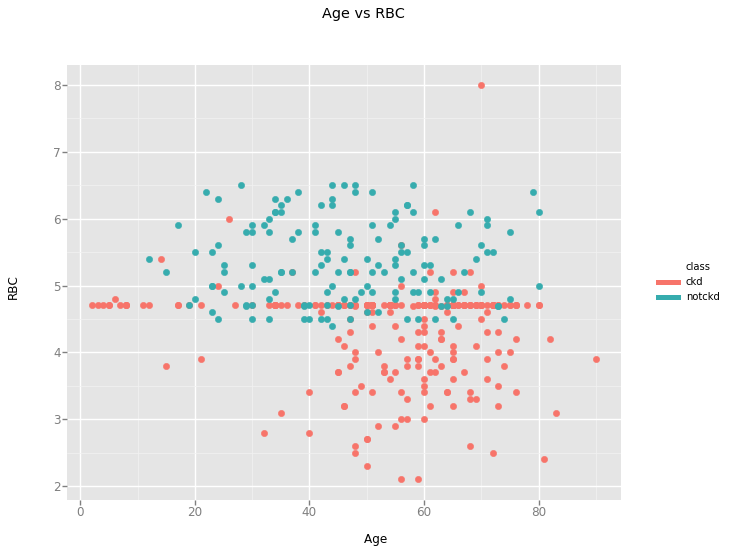

<ggplot: (8775731479346)>

In [40]:
#scenario 5
gg = ggplot(dataset, aes('age','rbcc', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Age vs RBC') + xlab('Age ') + ylab('RBC')

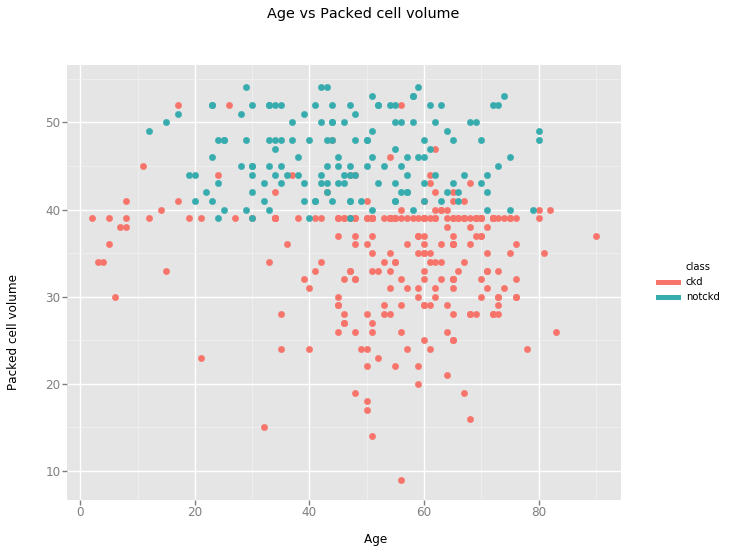

<ggplot: (-9223363261123282677)>

In [41]:
#scenario 6
gg = ggplot(dataset, aes('age','pcv', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Age vs Packed cell volume') + xlab('Age ') + ylab('Packed cell volume')

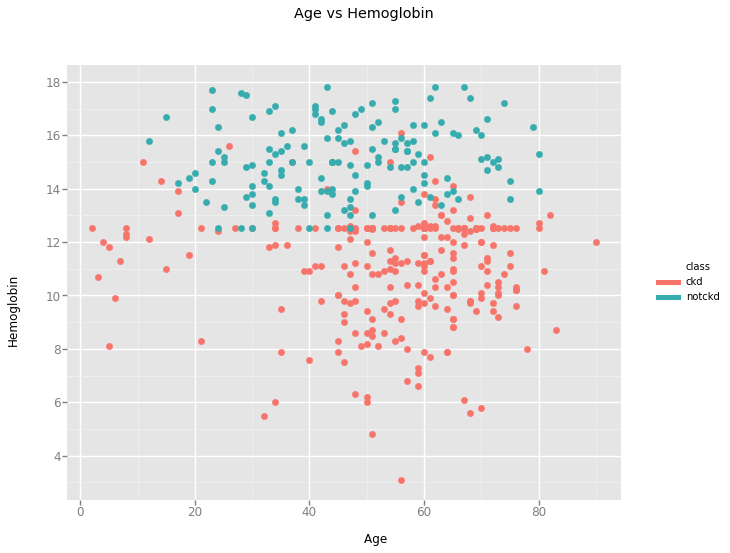

<ggplot: (8775731421560)>

In [42]:
#scenario 7
gg = ggplot(dataset, aes('age','hemo', color='class')) 
gg + geom_point(size=40.0) + ggtitle('Age vs Hemoglobin') + xlab('Age ') + ylab('Hemoglobin')

In [15]:
#split-out validation dataset
array = dataset.values
X = array[:,0:24]
Y = array[:,24]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [16]:
#test option and evaluation metric
seed = 7
scoring= 'accuracy'

In [66]:
#spot check algorithms
models= []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print('\n' + msg)


LR: 0.978125 (0.031406)

LDA: 0.965625 (0.035493)

KNN: 0.715625 (0.054932)

CART: 0.962500 (0.018750)

NB: 0.959375 (0.039652)

SVM: 0.640625 (0.061317)


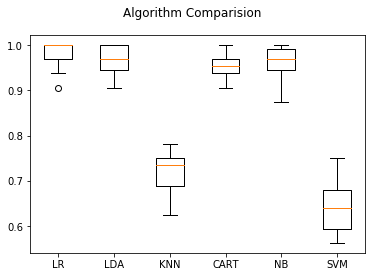

In [18]:
#comparing algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
#make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print('Accuracy score ' + str(accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy score 0.975
[[45  0]
 [ 2 33]]
             precision    recall  f1-score   support

        ckd       0.96      1.00      0.98        45
     notckd       1.00      0.94      0.97        35

avg / total       0.98      0.97      0.97        80



In [62]:
print('Live, let live. \n\n \tThank you!')

Live, let live. 

 	Thank you!
